In [1]:
import warnings; warnings.filterwarnings("ignore")
import os;
from sys import platform
print(os.getcwd())
if platform == "darwin":
    os.chdir('/Users/ziyingc/Dropbox/Lab/MotorCortex')
elif platform == "win32":
    os.chdir('D:\Dropbox\Lab\MotorCortex')
print(os.getcwd())
import numpy as np
import comparison as cmp
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import matplotlib.lines as mlines
from matplotlib.patches import Patch
from matplotlib.lines import Line2D
from matplotlib.gridspec import GridSpec
import matplotlib.cm as cm; 
import matplotlib.mlab as mlab
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import pycwt as wavelet; mother = wavelet.Morlet(6)
from scipy import stats
import read_data as rd;   import time2frequency as t2f
import behavior_track as bt ; import behavior_plot as bp ;
import philters
fps = 30; fs_out = 1000; fs = 30000; T = 1/fs_out;
N = int((1/fps)/T/2+1);

sgn   = ['***','**','*']
P_sgn = np.array([0.0001, 0.001, 0.05])

/Users/ziyingc/Dropbox/Lab/MotorCortex/Multi_Rats_ver2.0
/Users/ziyingc/Dropbox/Lab/MotorCortex


In [2]:
mode = 'FFT'
f = np.load('Rats/freqs_'+mode+'_'+str(fs_out)+'.npy');x_fit = np.log10(f); 
T_pre = 0


idx_band = np.load('Rats/idx_band.npy')
f_band = f[idx_band]
l_fb = len(f_band)

T1 = np.load('Rats/T1.npy');
T2 = np.load('Rats/T2.npy');

t = np.arange(T_pre+T2).astype('int')/fps;

sgn   = ['***','**','*']
P_sgn = np.array([0.0001, 0.001, 0.05])


idx_bt_1 = np.load('Rats/idx_bt_1.npy')
idx_bt_2 = np.load('Rats/idx_bt_2.npy')
idx_bf_b = np.load('Rats/idx_bf_b.npy')
idx_bf_l = np.load('Rats/idx_bf_l.npy');
idx_bf_h = np.load('Rats/idx_bf_h.npy');

# idx_bf_l = np.logical_and(f_band>=20.00, f_band<=30.00);
# idx_bf_h = np.logical_and(f_band>=31.25, f_band<=41.25);
# idx_bt_1 = np.arange(T_pre+60,    T_pre+60+30).astype('int');
# idx_bt_2 = np.arange(T_pre+T1-10, T_pre+T1+20).astype('int');

print('T1:', T1, 'T2:', T2, idx_bt_1[0], idx_bt_1[-1], idx_bt_2[0], idx_bt_2[-1])
f_beta_b = f_band[idx_bf_b];
f_beta_l = f_band[idx_bf_l]; f_win_l = np.hanning(len(f_beta_l))
f_beta_h = f_band[idx_bf_h]; f_win_h = np.hanning(len(f_beta_h))

print(f_beta_b[0], f_beta_b[-1], f_beta_l[0], f_beta_l[-1], f_beta_h[0], f_beta_h[-1], idx_bt_1[[0,-1]], idx_bt_2[[0,-1]])

T1: 90 T2: 120 10 54 70 114
13.75 22.5 23.75 32.5 33.75 42.5 [10 54] [ 70 114]


In [6]:
# rats = ''

# print(rats)
# erfdn = np.load('Rats/Rats_ephy'+rats+'.npy')#[[0]];
# n_r = len(erfdn)

# fig = plt.figure(1, figsize=(1, 1))
# fig.set_figheight(10); fig.set_figwidth(20)
# gs  = GridSpec(2 , 4);
# N_win = 15
# rr = 0

# for rfdn in erfdn:
    
#     epn       = np.load(rfdn+'tracking'+'/epn_ephy'+rats+'.npy')
#     print(rfdn[9:len(rfdn)-1], len(epn))
#     n_k = len(epn)
#     idx_k   = np.zeros((n_k,))>1
    
#     spd_f_ac = np.empty((0, T2+T_pre))
#     n_acc_total = 0
#     kk = 0
#     lag_m = np.load(rfdn+'tracking/lag_m.npy')
# #     idx_acc_f_T = np.load(rfdn+'tracking/idx_acc_f_T.npy')
#     for k in epn:
#         fdn = rfdn + k + '/'
#         spd_f = np.load(fdn+'tracking/'+'spd_kal_f.npy')
#         spd_f = np.convolve(spd_f, np.ones((N_win,))/N_win, mode='same')
#         ts_f = np.load(fdn+'tracking/'+'ts_f.npy'); l_t = len(ts_f)
#         idx_acc_f   = np.load(fdn+'tracking/idx_acc_f.npy');
#         T_acc_f     = np.load(fdn+'tracking/T_acc_f.npy');
#         idx_acc_f_k = np.load(fdn+'tracking/idx_acc_f_k.npy');
#         n_acc = len(idx_acc_f)
#         n_acc_total = n_acc_total+n_acc
#         idx_pre_ac = np.zeros((l_t,))>1;
#         if n_acc>0:
#             lag   = lag_m[idx_acc_f_k];
#             idx_acc_f = idx_acc_f+T_acc_f-lag
#             idx_k[kk] = True
#             for i in np.arange(len(idx_acc_f)):
#                 t_ref = idx_acc_f[i]
#                 idx_t_spec = np.arange(t_ref-T_pre,t_ref+T2).astype('int')
#                 idx_pre_ac[idx_t_spec] = True
#                 spd_f_ac = np.vstack((spd_f_ac, spd_f[idx_t_spec]))
        
#         kk += 1
#     print(spd_f_ac.shape, idx_bt_1.shape, idx_bt_2.shape)
#     ax_idx = gs[rr];ax = fig.add_subplot(ax_idx);
#     ax.set_title(rfdn[9:len(rfdn)-1] + ' No. of sess: '+str(n_k) +' \n No. of accel: '+str(n_acc_total), fontsize=8);
#     for i in np.arange(n_acc_total):
# #         if idx_acc_f_T[i]:
#         ax.plot(idx_bt_1/30, spd_f_ac[i,idx_bt_1], 'r',lw =0.1)
#         ax.plot(idx_bt_2/30, spd_f_ac[i,idx_bt_2], 'b--',lw =0.1)

#     ax.set_ylim([-5,20]);ax.tick_params(labelsize=5)
#     ax.text(idx_bt_1.mean(),-3, 'T1')
#     ax.text(idx_bt_2.mean(),-3, 'T2')
#     rr += 1

# fig.suptitle('Pre_acceleration and acceleration cases', fontsize=15)

_pre
Swashbuckler 7
49 (33, 120, 49) (33, 120, 49)
Outlaw 6
57 (33, 120, 57) (33, 120, 57)
Drifter 9
80 (33, 120, 80) (33, 120, 80)
Quartus 6
65 (33, 120, 65) (33, 120, 65)
Lenny 3
34 (33, 120, 34) (33, 120, 34)


Text(0.5,0.98,'with 7 days of lesion, two sides have not big difference')

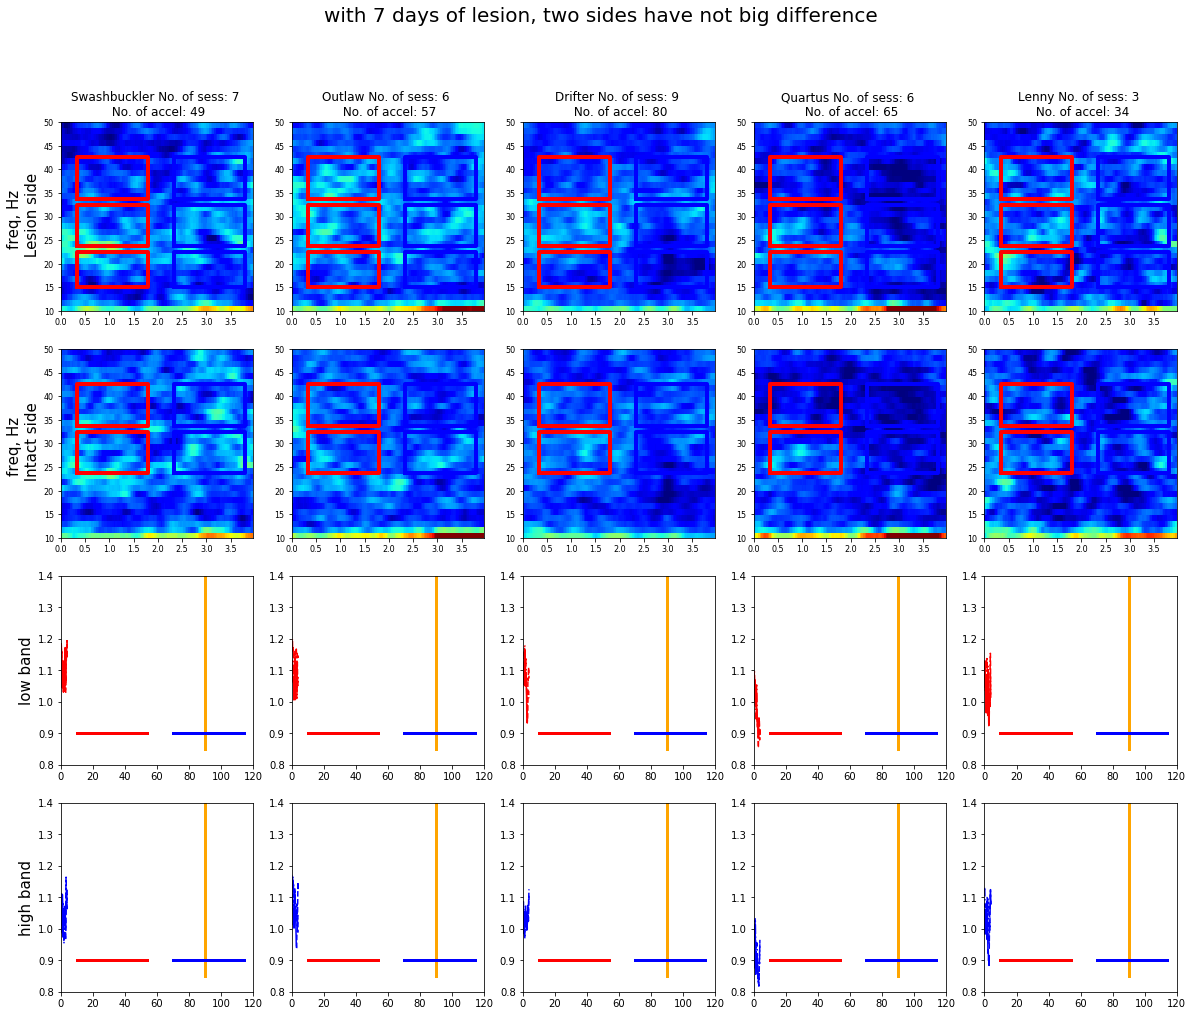

In [65]:
# rats = ''
rats = '_pre'
print(rats)
erfdn = np.load('Rats/Rats_ephy'+rats+'.npy')#[[0]];
n_r = len(erfdn)

fig = plt.figure(1, figsize=(1, 1))
fig.set_figheight(16); fig.set_figwidth(n_r*4)
gs  = GridSpec(4 , n_r);

rr = 0

for rfdn in erfdn:
    
    epn       = np.load(rfdn+'tracking'+'/epn_ephy'+rats+'.npy')
    slope     = np.load(rfdn+'tracking'+'/slope_epn_ephy'+rats+'.npy')
    intercept = np.load(rfdn+'tracking'+'/intercept_epn_ephy'+rats+'.npy')

    subset = np.load(rfdn+'tracking'+'/subset_ephy_li.npy');
    print(rfdn[9:len(rfdn)-1], len(epn))
    n_k = len(epn)

    
#     Y_acc_l = np.zeros((l_fb, T2+T_pre));
#     Y_acc_i = np.zeros((l_fb, T2+T_pre));
    Y_acc_l = np.empty((l_fb, T2+T_pre, 0));
    Y_acc_i = np.empty((l_fb, T2+T_pre, 0));
    y_acc_i_all = np.zeros((l_fb, ));
    
    Y_acc_l_m_bf_l = np.empty((0, T2+T_pre))
    Y_acc_l_m_bf_h = np.empty((0, T2+T_pre))
    Y_acc_i_m_bf_l = np.empty((0, T2+T_pre))
    Y_acc_i_m_bf_h = np.empty((0, T2+T_pre))
    spd_f_ac = np.empty((0, T2+T_pre))
    n_acc_total = 0
    kk = 0
    lag_m       = np.load(rfdn+'tracking/lag_m.npy')
    idx_acc_f_T = np.load(rfdn+'tracking/idx_acc_f_T.npy')
    for k in epn:
        fdn = rfdn + k + '/'
        idx_clean_f   = np.load(fdn+'tracking/'+'idx_clean_f.npy');
        idx_clean_fft = np.load(fdn+'tracking/'+'idx_clean_fft.npy')
        idx_clean     = np.logical_and(idx_clean_f, idx_clean_fft)

        
        ts_f = np.load(fdn+'tracking/'+'ts_f.npy'); l_t = len(ts_f)
        T_ts = len(ts_f[idx_clean])/fps/60

        i_ref = 0;   i = subset[i_ref];    chn = str(i//10)+str(i%10)
        Y_f = np.load(fdn + mode+'_'+str(fs_out)+'/ch.'+chn+'.fps.npy')
        y_fit = 10**(x_fit*slope[i_ref,kk] + intercept[i_ref,kk]);  Y_f_fit_l = (Y_f/y_fit)[:,idx_band]
#         y_pre_acc = np.mean(Y_f_fit_l[idx_clean,:],axis=0)
#         Y_f_fit_l = Y_f_fit_l/y_pre_acc

        i_ref = 1;   i = subset[i_ref];    chn = str(i//10)+str(i%10)
        Y_f = np.load(fdn + mode+'_'+str(fs_out)+'/ch.'+chn+'.fps.npy')
        y_fit = 10**(x_fit*slope[i_ref,kk] + intercept[i_ref,kk]);  Y_f_fit_i = (Y_f/y_fit)[:,idx_band]
#         y_pre_acc = np.mean(Y_f_fit_i[idx_clean,:],axis=0)
#         Y_f_fit_i = Y_f_fit_i/y_pre_acc

        idx_acc_f   = np.load(fdn+'tracking/idx_acc_f.npy');
        T_acc_f     = np.load(fdn+'tracking/T_acc_f.npy');
        idx_acc_f_k = np.load(fdn+'tracking/idx_acc_f_k.npy');
        n_acc = len(idx_acc_f)
        idx_pre_ac = np.zeros((l_t,))>1;
        if n_acc>0:
            lag   = lag_m[idx_acc_f_k];
            idx_acc_f_T_k = idx_acc_f_T[idx_acc_f_k];
            lag       = lag[idx_acc_f_T_k]
            T_acc_f   = T_acc_f[idx_acc_f_T_k]
            idx_acc_f = idx_acc_f[idx_acc_f_T_k]
            n_acc = len(idx_acc_f)
            n_acc_total = n_acc_total+n_acc
            if n_acc>0:
                
                idx_acc_f = idx_acc_f+T_acc_f-lag
                
                for i in np.arange(len(idx_acc_f)):
                    t_ref = idx_acc_f[i]
                    idx_t_spec = np.arange(t_ref-T_pre,t_ref+T2).astype('int')
                    idx_pre_ac[idx_t_spec] = True

                    y_acc_l = Y_f_fit_l[idx_t_spec,:].T;  #Y_acc_l = Y_acc_l + y_acc_l
                    Y_acc_l = np.dstack((Y_acc_l,y_acc_l))
                    y_acc_l_m_bf_l = np.mean(y_acc_l[idx_bf_l,:], axis=0);
                    y_acc_l_m_bf_h = np.mean(y_acc_l[idx_bf_h,:], axis=0);
                    Y_acc_l_m_bf_l = np.vstack((Y_acc_l_m_bf_l, y_acc_l_m_bf_l))
                    Y_acc_l_m_bf_h = np.vstack((Y_acc_l_m_bf_h, y_acc_l_m_bf_h))

                    y_acc_i = Y_f_fit_i[idx_t_spec,:].T;  #Y_acc_i = Y_acc_i + y_acc_i
                    Y_acc_i = np.dstack((Y_acc_i,y_acc_i))
                    y_acc_i_m_bf_l = np.mean(y_acc_i[idx_bf_l,:], axis=0);
                    y_acc_i_m_bf_h = np.mean(y_acc_i[idx_bf_h,:], axis=0);
                    Y_acc_i_m_bf_l = np.vstack((Y_acc_i_m_bf_l, y_acc_i_m_bf_l))
                    Y_acc_i_m_bf_h = np.vstack((Y_acc_i_m_bf_h, y_acc_i_m_bf_h))

        kk += 1

    Y_acc_l_m = np.mean(Y_acc_l,axis=2)
    ax_idx = gs[0,rr]; ax = fig.add_subplot(ax_idx);
    im = ax.pcolormesh(t, f_band, Y_acc_l_m, 
                               vmin = 0.8,
                               vmax = 2.0,
                       cmap=cm.jet);
#     fig.colorbar(im, ax=ax);
    ax.set_title(rfdn[9:len(rfdn)-1] + ' No. of sess: '+str(n_k) +' \n No. of accel: '+str(n_acc_total), fontsize=12);
    
    ax.tick_params(labelsize=8);
    t1 = t[idx_bt_1[0]];  t2 = t[idx_bt_1[-1]];
    fl1 = f_beta_b[0]; fl2 = f_beta_b[-1]
    ax.plot([t1, t1, t2, t2, t1], [fl1, fl2, fl2, fl1, fl1], 'r', lw=4)
    fl1 = f_beta_l[0]; fl2 = f_beta_l[-1]
    ax.plot([t1, t1, t2, t2, t1], [fl1, fl2, fl2, fl1, fl1], 'r', lw=4)
    fl1 = f_beta_h[0]; fl2 = f_beta_h[-1]
    ax.plot([t1, t1, t2, t2, t1], [fl1, fl2, fl2, fl1, fl1], 'r', lw=4)
    
    t1 = t[idx_bt_2[0]];  t2 = t[idx_bt_2[-1]];
    
    fl1 = f_beta_b[0]; fl2 = f_beta_b[-1]
    ax.plot([t1, t1, t2, t2, t1], [fl1, fl2, fl2, fl1, fl1], 'b', lw=4)
    fl1 = f_beta_l[0]; fl2 = f_beta_l[-1]
    ax.plot([t1, t1, t2, t2, t1], [fl1, fl2, fl2, fl1, fl1], 'b', lw=4)
    fl1 = f_beta_h[0]; fl2 = f_beta_h[-1]
    ax.plot([t1, t1, t2, t2, t1], [fl1, fl2, fl2, fl1, fl1], 'b', lw=4)  

#     Y_acc_i_m = Y_acc_i/n_acc_total
    Y_acc_i_m = np.mean(Y_acc_i,axis=2)
    ax_idx = gs[1,rr]; ax = fig.add_subplot(ax_idx);
    im = ax.pcolormesh(t, f_band, Y_acc_i_m, 
                               vmin = 0.8,
                               vmax = 2.0,
                       cmap=cm.jet);
#     fig.colorbar(im, ax=ax);
    ax.tick_params(labelsize=8);
    t1 = t[idx_bt_1[0]];  t2 = t[idx_bt_1[-1]];
    fl1 = f_beta_l[0]; fl2 = f_beta_l[-1]
    ax.plot([t1, t1, t2, t2, t1], [fl1, fl2, fl2, fl1, fl1], 'r', lw=4)
    fl1 = f_beta_h[0]; fl2 = f_beta_h[-1]
    ax.plot([t1, t1, t2, t2, t1], [fl1, fl2, fl2, fl1, fl1], 'r', lw=4)
    
    t1 = t[idx_bt_2[0]];  t2 = t[idx_bt_2[-1]];
    fl1 = f_beta_l[0]; fl2 = f_beta_l[-1]
    ax.plot([t1, t1, t2, t2, t1], [fl1, fl2, fl2, fl1, fl1], 'b', lw=4)
    fl1 = f_beta_h[0]; fl2 = f_beta_h[-1]
    ax.plot([t1, t1, t2, t2, t1], [fl1, fl2, fl2, fl1, fl1], 'b', lw=4)  
    
#     t3 = idx_bt_2[0];  t4 = idx_bt_2[-1]; 
#     ax.plot([t3,t3,t4,t4,t3], [fl1, fl2, fl2, fl1, fl1], 'k', lw=3)
#     t1 = idx_bt_1[0];  t3 = idx_bt_2[0];  fl1 = f_beta_h[0]
#     t2 = idx_bt_1[-1]; t4 = idx_bt_2[-1]; fl2 = f_beta_h[-1]
#     ax.plot([t1,t1,t2,t2,t1], [fl1, fl2, fl2, fl1, fl1], 'k--',lw=3)
#     ax.plot([t3,t3,t4,t4,t3], [fl1, fl2, fl2, fl1, fl1], 'k--',lw=3)
    
    ax_idx = gs[2,rr];ax = fig.add_subplot(ax_idx);
    ax.plot(t[T_pre:T_pre+T1], np.mean(Y_acc_i_m_bf_l, axis = 0)[T_pre:T_pre+T1], 'r-')
    ax.plot(t[T1:T2], np.mean(Y_acc_i_m_bf_l, axis = 0)[T1:T2], 'r--')    
    ax.plot(t[T_pre:T_pre+T1], np.mean(Y_acc_l_m_bf_l, axis = 0)[T_pre:T_pre+T1], 'r-.')
    ax.plot(t[T1:T2], np.mean(Y_acc_l_m_bf_l, axis = 0)[T1:T2], 'r--')
    
#     y_acc_i_m_bf_l = np.mean(Y_acc_i_m[idx_bf_l,:], axis=0);
#     ax.plot(t[T_pre:T_pre+T1], y_acc_i_m_bf_l[T_pre:T_pre+T1], 'r-')
#     ax.plot(t[T1:T2],          y_acc_i_m_bf_l[T1:T2], 'r--')
    
#     y_acc_l_m_bf_l = np.mean(Y_acc_l_m[idx_bf_l,:], axis=0);
#     ax.plot(t[T_pre:T_pre+T1], y_acc_l_m_bf_l[T_pre:T_pre+T1], 'r-.')
#     ax.plot(t[T1:T2],          y_acc_l_m_bf_l[T1:T2], 'r--')
    
    ax.plot([T1,T1],[0.85, 1.5], color = 'orange', lw = 3)
    ax.plot(idx_bt_1[[0,-1]],[0.9, 0.9], color = 'r', lw = 3)
    ax.plot(idx_bt_2[[0,-1]],[0.9, 0.9], color = 'b', lw = 3)
    ax.set_ylim([0.80, 1.40]);ax.set_xlim([0, T_pre+T2])
    
    ax_idx = gs[3,rr];ax = fig.add_subplot(ax_idx);
    ax.plot(t[T_pre:T_pre+T1], np.mean(Y_acc_i_m_bf_h, axis = 0)[T_pre:T_pre+T1], 'b-')
    ax.plot(t[T1:T2], np.mean(Y_acc_i_m_bf_h, axis = 0)[T1:T2], 'b--')
    ax.plot(t[T_pre:T_pre+T1], np.mean(Y_acc_l_m_bf_h, axis = 0)[T_pre:T_pre+T1], 'b-.')
    ax.plot(t[T1:T2], np.mean(Y_acc_l_m_bf_h, axis = 0)[T1:T2], 'b--')
    ax.plot([T1,T1],[0.85, 1.5], color = 'orange', lw = 3)
    ax.plot(idx_bt_1[[0,-1]],[0.9, 0.9], color = 'r', lw = 3)
    ax.plot(idx_bt_2[[0,-1]],[0.9, 0.9], color = 'b', lw = 3)
    ax.set_ylim([0.8, 1.4]);ax.set_xlim([0, T_pre+T2])

    
#     ax.set_ylim([0.8, 1.3])
#     ax.set_xlim([0, T2])

#     y_acc_i_m_bf_l = np.mean(Y_acc_i_m[idx_bf_l,:], axis=0);
#     y_acc_i_m_bf_h = np.mean(Y_acc_i_m[idx_bf_h,:], axis=0);
#     ax.plot(t, y_acc_i_m_bf_l, 'r')
#     ax.plot(t, y_acc_i_m_bf_h, 'b')

#     y_acc_i_m_bf_l_max = np.max(Y_acc_i_m_bf_l[:,120:T2], axis = 1);
#     for i in np.arange(n_acc_total):
#         ax_idx = gs[2,rr];ax = fig.add_subplot(ax_idx);
#         ax.plot(t, Y_acc_i_m_bf_l[i,:], 'r', lw = 0.5)
#         ax_idx = gs[3,rr];ax = fig.add_subplot(ax_idx);
#         ax.plot(t, spd_f_ac[i,:], lw =0.5)

    print(n_acc_total, Y_acc_l.shape, Y_acc_i.shape)
    rr += 1
    

ax_idx = gs[0,0]; ax = fig.add_subplot(ax_idx);
ax.set_ylabel('freq, Hz \n Lesion side', fontsize = 15)
ax_idx = gs[1,0]; ax = fig.add_subplot(ax_idx);
ax.set_ylabel('freq, Hz \n Intact side', fontsize = 15)
ax_idx = gs[2,0]; ax = fig.add_subplot(ax_idx);
ax.set_ylabel('low band', fontsize = 15)
ax_idx = gs[3,0]; ax = fig.add_subplot(ax_idx);
ax.set_ylabel('high band', fontsize = 15)



# preacc = Line2D([0], [0], color='r', ls = '-', lw=1, label='pre_acceleration')
# acc    = Line2D([0], [0], color='r', ls = '--', lw=1, label='acceleration')
# intact = Patch(facecolor='red',label='intact')
# lesion = Patch(facecolor='blue',label='lesion')

# ax.legend(handles=[preacc, acc, intact, lesion], loc='lower left', fontsize = 10)
# ax_idx = gs[3,0]; ax = fig.add_subplot(ax_idx)
# ax.set_xlabel('t, Frames 30 fps, 5 seconds total');ax.set_ylabel('speed, cm/s');
fig.suptitle('with 7 days of lesion, two sides have not big difference', fontsize=20)

# Lesion

_post
Outlaw 1
1 1


Text(0.5,0,'seconds ')

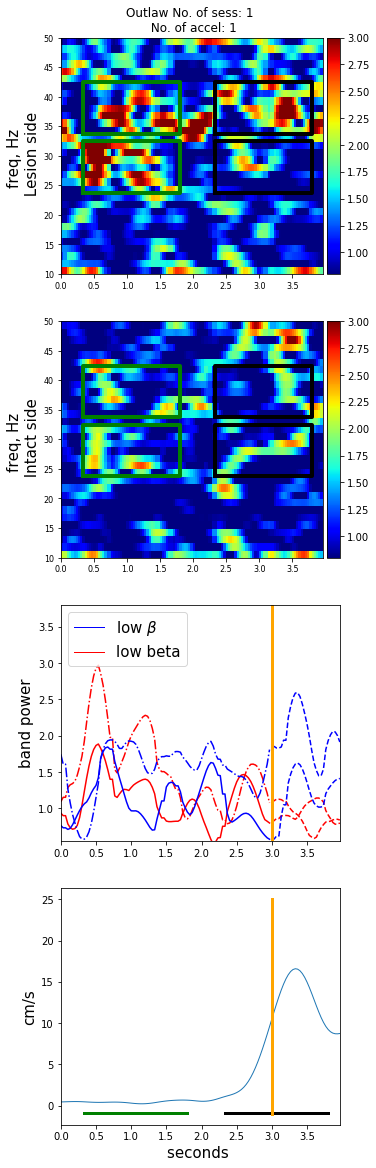

In [12]:
rats = '_post'
# rats = '_pre'
print(rats)
erfdn = np.load('Rats/Rats_ephy'+rats+'.npy')[[1]];
n_r = len(erfdn)

fig = plt.figure(1, figsize=(1, 1))
fig.set_figheight(20); fig.set_figwidth(n_r*5)
gs  = GridSpec(4 , n_r);

rr = 0
n_acc_total_r = 0
for rfdn in erfdn:
    
    epn       = np.load(rfdn+'tracking'+'/epn_ephy'+rats+'.npy')[[21]]
    slope     = np.load(rfdn+'tracking'+'/slope_epn_ephy'+rats+'.npy')
    intercept = np.load(rfdn+'tracking'+'/intercept_epn_ephy'+rats+'.npy')

    subset = np.load(rfdn+'tracking'+'/subset_ephy_li.npy');
    print(rfdn[9:len(rfdn)-1], len(epn))
    n_k = len(epn)
    
    idx_k   = np.zeros((n_k,))>1
    
    Y_acc_l = np.zeros((l_fb, T2+T_pre));
    Y_acc_i = np.zeros((l_fb, T2+T_pre));
    y_acc_i_all = np.zeros((l_fb, ));
    
    Y_acc_l_m_bf_l = np.empty((0, T2+T_pre))
    Y_acc_l_m_bf_h = np.empty((0, T2+T_pre))
    Y_acc_i_m_bf_l = np.empty((0, T2+T_pre))
    Y_acc_i_m_bf_h = np.empty((0, T2+T_pre))
    spd_f_ac = np.empty((0, T2+T_pre))
    n_acc_total = 0
    kk = 0
    lag_m       = np.load(rfdn+'tracking/lag_m.npy')
    idx_acc_f_T = np.load(rfdn+'tracking/idx_acc_f_T.npy')
    for k in epn:
        fdn = rfdn + k + '/'
#         spd_f   = np.load(fdn+'tracking/'+'spd_f.npy');
        spd_f = np.load(fdn+'tracking/'+'spd_kal_f.npy');N_win = 10
        spd_f = np.convolve(spd_f, np.ones((N_win,))/N_win, mode='same')
        idx_clean_f   = np.load(fdn+'tracking/'+'idx_clean_f.npy');
        idx_clean_fft = np.load(fdn+'tracking/'+'idx_clean_fft.npy')
        idx_clean     = np.logical_and(idx_clean_f, idx_clean_fft)
        
        ts_f = np.load(fdn+'tracking/'+'ts_f.npy'); l_t = len(ts_f)
        T_ts = len(ts_f[idx_clean])/fps/60

        i_ref = 0;   i = subset[i_ref];    chn = str(i//10)+str(i%10)
        Y_f = np.load(fdn + mode+'_'+str(fs_out)+'/ch.'+chn+'.fps.npy')
        y_fit = 10**(x_fit*slope[i_ref,kk] + intercept[i_ref,kk]);  Y_f_fit_l = (Y_f/y_fit)[:,idx_band]
#         y_pre_acc = np.mean(Y_f_fit_l[idx_clean,:],axis=0)
#         Y_f_fit_l = Y_f_fit_l/y_pre_acc

        i_ref = 1;   i = subset[i_ref];    chn = str(i//10)+str(i%10)
        Y_f = np.load(fdn + mode+'_'+str(fs_out)+'/ch.'+chn+'.fps.npy')
        y_fit = 10**(x_fit*slope[i_ref,kk] + intercept[i_ref,kk]);  Y_f_fit_i = (Y_f/y_fit)[:,idx_band]
#         y_pre_acc = np.mean(Y_f_fit_i[idx_clean,:],axis=0)
#         Y_f_fit_i = Y_f_fit_i/y_pre_acc

        idx_acc_f   = np.load(fdn+'tracking/idx_acc_f.npy')[[1]];
        T_acc_f   = np.load(fdn+'tracking/T_acc_f.npy')[[1]];
        idx_acc_f_k = np.load(fdn+'tracking/idx_acc_f_k.npy')[[1]];
        
        n_acc = len(idx_acc_f)
        if n_acc>0:
            lag   = lag_m[idx_acc_f_k];
            idx_acc_f_T_k = idx_acc_f_T[idx_acc_f_k];
            lag       = lag[idx_acc_f_T_k]
            T_acc_f   = T_acc_f[idx_acc_f_T_k]
            idx_acc_f = idx_acc_f[idx_acc_f_T_k]
            n_acc = len(idx_acc_f)
            n_acc_total = n_acc_total+n_acc
            if n_acc>0:
                idx_acc_f = idx_acc_f+T_acc_f-lag
                for i in np.arange(len(idx_acc_f)):
                    t_ref = idx_acc_f[i]
                    idx_t_spec = np.arange(t_ref-T_pre,t_ref+T2).astype('int')

                    y_acc_l = Y_f_fit_l[idx_t_spec,:].T;  Y_acc_l = Y_acc_l + y_acc_l
                    y_acc_l_m_bf_l = np.mean(y_acc_l[idx_bf_l,:], axis=0);
                    y_acc_l_m_bf_h = np.mean(y_acc_l[idx_bf_h,:], axis=0);
                    Y_acc_l_m_bf_l = np.vstack((Y_acc_l_m_bf_l, y_acc_l_m_bf_l))
                    Y_acc_l_m_bf_h = np.vstack((Y_acc_l_m_bf_h, y_acc_l_m_bf_h))

                    y_acc_i = Y_f_fit_i[idx_t_spec,:].T;  Y_acc_i = Y_acc_i + y_acc_i
                    y_acc_i_m_bf_l = np.mean(y_acc_i[idx_bf_l,:], axis=0);
                    y_acc_i_m_bf_h = np.mean(y_acc_i[idx_bf_h,:], axis=0);
                    Y_acc_i_m_bf_l = np.vstack((Y_acc_i_m_bf_l, y_acc_i_m_bf_l))
                    Y_acc_i_m_bf_h = np.vstack((Y_acc_i_m_bf_h, y_acc_i_m_bf_h))
                    
                    spd_f_ac = np.vstack((spd_f_ac,spd_f[idx_t_spec]))

        kk += 1
    Y_acc_l_m = Y_acc_l/n_acc_total
    ax_idx = gs[0,rr]; ax = fig.add_subplot(ax_idx);
    im = ax.pcolormesh(t, f_band, Y_acc_l_m, 
                               vmin = 0.8,
                               vmax = 3.0,
                       cmap=cm.jet);
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    fig.colorbar(im, cax=cax);
    
    
    ax.set_title(rfdn[9:len(rfdn)-1] + ' No. of sess: '+str(n_k) +' \n No. of accel: '+str(n_acc_total), fontsize=12);
    
    ax.tick_params(labelsize=8);
    t1 = t[idx_bt_1[0]];  t2 = t[idx_bt_1[-1]];
    fl1 = f_beta_l[0]; fl2 = f_beta_l[-1]
    ax.plot([t1, t1, t2, t2, t1], [fl1, fl2, fl2, fl1, fl1], 'g-', lw=4)
    fl1 = f_beta_h[0]; fl2 = f_beta_h[-1]
    ax.plot([t1, t1, t2, t2, t1], [fl1, fl2, fl2, fl1, fl1], 'g-', lw=4)
    
    t1 = t[idx_bt_2[0]];  t2 = t[idx_bt_2[-1]];
    fl1 = f_beta_l[0]; fl2 = f_beta_l[-1]
    ax.plot([t1, t1, t2, t2, t1], [fl1, fl2, fl2, fl1, fl1], 'k-', lw=4)
    fl1 = f_beta_h[0]; fl2 = f_beta_h[-1]
    ax.plot([t1, t1, t2, t2, t1], [fl1, fl2, fl2, fl1, fl1], 'k-', lw=4) 
    Y_acc_i_m = Y_acc_i/n_acc_total
    ax_idx = gs[1,rr]; ax = fig.add_subplot(ax_idx);
    im = ax.pcolormesh(t, f_band, Y_acc_i_m, 
                               vmin = 0.8,
                               vmax = 3.0,
                       cmap=cm.jet);
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.05)
    fig.colorbar(im, cax=cax);
    ax.tick_params(labelsize=8);
    t1 = t[idx_bt_1[0]];  t2 = t[idx_bt_1[-1]];
    fl1 = f_beta_l[0]; fl2 = f_beta_l[-1]
    ax.plot([t1, t1, t2, t2, t1], [fl1, fl2, fl2, fl1, fl1], 'g', lw=4)
    fl1 = f_beta_h[0]; fl2 = f_beta_h[-1]
    ax.plot([t1, t1, t2, t2, t1], [fl1, fl2, fl2, fl1, fl1], 'g', lw=4)
    
    t1 = t[idx_bt_2[0]];  t2 = t[idx_bt_2[-1]];
    fl1 = f_beta_l[0]; fl2 = f_beta_l[-1]
    ax.plot([t1, t1, t2, t2, t1], [fl1, fl2, fl2, fl1, fl1], 'k', lw=4)
    fl1 = f_beta_h[0]; fl2 = f_beta_h[-1]
    ax.plot([t1, t1, t2, t2, t1], [fl1, fl2, fl2, fl1, fl1], 'k', lw=4) 
    
    ax_idx = gs[2,rr];ax = fig.add_subplot(ax_idx);
    
    Y_acc_i_m_bf_l_m = np.mean(Y_acc_i_m_bf_l, axis = 0)[T_pre:T_pre+T1]
    Y_acc_i_m_bf_l_s = np.std(Y_acc_i_m_bf_l, axis = 0)[T_pre:T_pre+T1]
    ax.plot(t[T_pre:T_pre+T1], Y_acc_i_m_bf_l_m, 'r-')

    
    ax.plot(t[T1:T2], np.mean(Y_acc_i_m_bf_l, axis = 0)[T1:T2], 'r--')
    ax.plot(t[T_pre:T_pre+T1], np.mean(Y_acc_l_m_bf_l, axis = 0)[T_pre:T_pre+T1], 'r-.')
    ax.plot(t[T1:T2], np.mean(Y_acc_l_m_bf_l, axis = 0)[T1:T2], 'r--')
    ax.plot([T1,T1],[0.70, 1.3], color = 'orange', lw = 3)
#     ax.set_ylim([0.90, 1.3]);ax.set_xlim([0, T2])
    
#     ax_idx = gs[2,rr];ax = fig.add_subplot(ax_idx);
    ax.plot(t[T_pre:T_pre+T1], np.mean(Y_acc_i_m_bf_h, axis = 0)[T_pre:T_pre+T1], 'b-')
    
    
    ax.plot(t[T1:T2], np.mean(Y_acc_i_m_bf_h, axis = 0)[T1:T2], 'b--')
    ax.plot(t[T_pre:T_pre+T1], np.mean(Y_acc_l_m_bf_h, axis = 0)[T_pre:T_pre+T1], 'b-.')
    ax.plot(t[T1:T2], np.mean(Y_acc_l_m_bf_h, axis = 0)[T1:T2], 'b--')
    ax.plot([t[T1],t[T1]],[0.0, 5], color = 'orange', lw = 3)
    
    
    ax.plot(idx_bt_1[[0,-1]],[0.9, 0.9], color = 'g', lw = 3)
    ax.plot(idx_bt_2[[0,-1]],[0.9, 0.9], color = 'k', lw = 3)
    ax.set_ylim([0.55, 3.8]);
    ax.set_xlim([t[0],t[T2-1]])
    
    ax_idx = gs[3,rr];ax = fig.add_subplot(ax_idx);
    for i in np.arange(n_acc_total):
        ax.plot(t, spd_f_ac[i,:], lw = 1)
    ax.plot(t[idx_bt_1[[0,-1]]],[-0.9, -0.9], color = 'g', lw = 3)
    ax.plot(t[idx_bt_2[[0,-1]]],[-0.9, -0.9], color = 'k', lw = 3)
    ax.plot([t[T1],t[T1]],[-1, 25], color = 'orange', lw = 3)
    
    ax.set_xlim([t[0],t[T2-1]])
    n_acc_total_r = n_acc_total_r+n_acc_total
    print(n_acc_total, n_acc_total_r)
    rr += 1
    

ax_idx = gs[0,0]; ax = fig.add_subplot(ax_idx);
ax.set_ylabel('freq, Hz \n Lesion side', fontsize = 15)
ax_idx = gs[1,0]; ax = fig.add_subplot(ax_idx);
ax.set_ylabel('freq, Hz \n Intact side', fontsize = 15)
ax_idx = gs[2,0]; ax = fig.add_subplot(ax_idx);
ax.set_ylabel('band power',  fontsize = 15)

lesion_l_post = Line2D([0], [0], color='b', lw=1, label='low '+r'$\beta$')
Intact_l_post = Line2D([0], [0], color='r', lw=1, label='low beta')
ax.legend(handles=[lesion_l_post, Intact_l_post], loc='upper left', fontsize=15)

ax_idx = gs[3,0]; ax = fig.add_subplot(ax_idx);
ax.set_ylabel('cm/s',  fontsize = 15)
ax.set_xlabel('seconds ',  fontsize = 15)


# ax_idx = gs[3,0]; ax = fig.add_subplot(ax_idx);
# ax.set_ylabel('high band', fontsize = 15)

# preacc = Line2D([0], [0], color='r', ls = '-', lw=1, label='pre_acceleration')
# acc    = Line2D([0], [0], color='r', ls = '--', lw=1, label='acceleration')
# intact = Patch(facecolor='red',label='intact')
# lesion = Patch(facecolor='blue',label='lesion')

# ax.legend(handles=[preacc, acc, intact, lesion], loc='lower left', fontsize = 10)
# ax_idx = gs[3,0]; ax = fig.add_subplot(ax_idx)
# ax.set_xlabel('t, Frames 30 fps, 5 seconds total');ax.set_ylabel('speed, cm/s');
# fig.suptitle('after 10 days after lesion, two sides have not big difference', fontsize=20)



In [ ]:
# rats = ''
rats = '_post'
# rats = '_pre'
print(rats)
erfdn = np.load('Rats/Rats_ephy'+rats+'.npy')[[1]];
n_r = len(erfdn)
rr = 0

for rfdn in erfdn:
    
    epn       = np.load(rfdn+'tracking'+'/epn_ephy'+rats+'.npy')[[21]]
    slope     = np.load(rfdn+'tracking'+'/slope_epn_ephy'+rats+'.npy')
    intercept = np.load(rfdn+'tracking'+'/intercept_epn_ephy'+rats+'.npy')
    
    P_acc_l_T1_l = np.load(rfdn+'tracking/P_acc_l_T1_l'+rats+'.npy')
    P_acc_l_T2_l = np.load(rfdn+'tracking/P_acc_l_T2_l'+rats+'.npy')
    P_acc_i_T1_l = np.load(rfdn+'tracking/P_acc_i_T1_l'+rats+'.npy')
    P_acc_i_T2_l = np.load(rfdn+'tracking/P_acc_i_T2_l'+rats+'.npy')
    P_acc_l_T1_h = np.load(rfdn+'tracking/P_acc_l_T1_h'+rats+'.npy')
    P_acc_l_T2_h = np.load(rfdn+'tracking/P_acc_l_T2_h'+rats+'.npy')
    P_acc_i_T1_h = np.load(rfdn+'tracking/P_acc_i_T1_h'+rats+'.npy')
    P_acc_i_T2_h = np.load(rfdn+'tracking/P_acc_i_T2_h'+rats+'.npy')
    
    r_acc_i_l   = (P_acc_i_T1_l-P_acc_i_T2_l)/P_acc_i_T1_l
    r_acc_l_l   = (P_acc_l_T1_l-P_acc_l_T2_l)/P_acc_l_T1_l

    r_acc_i_h   = (P_acc_i_T1_h-P_acc_i_T2_h)/P_acc_i_T1_h
    r_acc_l_h   = (P_acc_l_T1_h-P_acc_l_T2_h)/P_acc_l_T1_h

    subset = np.load(rfdn+'tracking'+'/subset_ephy_li.npy');
    
    n_k = len(epn)
    
    idx_k   = np.zeros((n_k,))>1
    
    Y_acc_l = np.zeros((l_fb, T2+T_pre));
    Y_acc_i = np.zeros((l_fb, T2+T_pre));
    y_acc_i_all = np.zeros((l_fb, ));
    
    Y_acc_l_m_bf_l = np.empty((0, T2+T_pre))
    Y_acc_l_m_bf_h = np.empty((0, T2+T_pre))
    Y_acc_i_m_bf_l = np.empty((0, T2+T_pre))
    Y_acc_i_m_bf_h = np.empty((0, T2+T_pre))
    spd_f_ac = np.empty((0, T2+T_pre))

    lag_m = np.load(rfdn+'tracking/lag_m.npy')
    idx_acc_f_T = np.load(rfdn+'tracking/idx_acc_f_T.npy')
    n_a = len(r_acc_i_l)
    fig = plt.figure(1, figsize=(1, 1))
    fig.set_figheight((int(n_a*4/12)+1)*5); fig.set_figwidth(12*5)
    gs  = GridSpec(int(n_a*4/12)+1 , 12);
    
    
    n_acc_fig = 0
    n_acc_total = 0
    kk = 0
    
    print(rfdn[9:len(rfdn)-1], len(epn), (int(n_a*4/12)+1)*12, n_a, P_acc_i_T2_h.shape, n_a, n_acc_total)
    for k in epn:
        fdn = rfdn + k + '/'
        spd_f = np.load(fdn+'tracking/'+'spd_kal_f.npy');N_win = 15
        spd_f = np.convolve(spd_f, np.ones((N_win,))/N_win, mode='same')
        pos_Y = np.load(fdn+'tracking/'+'pos_Y_f.npy')
        pos_X = np.load(fdn+'tracking/'+'pos_X_f.npy')
        idx_clean_f   = np.load(fdn+'tracking/'+'idx_clean_f.npy');
        idx_clean_fft = np.load(fdn+'tracking/'+'idx_clean_fft.npy')
        idx_clean     = np.logical_and(idx_clean_f, idx_clean_fft)
        
        ts_f = np.load(fdn+'tracking/'+'ts_f.npy'); l_t = len(ts_f)
        T_ts = len(ts_f[idx_clean])/fps/60

        i_ref = 0;   i = subset[i_ref];    chn = str(i//10)+str(i%10)
        Y_f = np.load(fdn + mode+'_'+str(fs_out)+'/ch.'+chn+'.fps.npy')
        y_fit = 10**(x_fit*slope[i_ref,kk] + intercept[i_ref,kk]);  Y_f_fit_l = (Y_f/y_fit)[:,idx_band]

        i_ref = 1;   i = subset[i_ref];    chn = str(i//10)+str(i%10)
        Y_f = np.load(fdn + mode+'_'+str(fs_out)+'/ch.'+chn+'.fps.npy')
        y_fit = 10**(x_fit*slope[i_ref,kk] + intercept[i_ref,kk]);  Y_f_fit_i = (Y_f/y_fit)[:,idx_band]


        idx_acc_f   = np.load(fdn+'tracking/idx_acc_f.npy');
        T_acc_f   = np.load(fdn+'tracking/T_acc_f.npy');
        idx_acc_f_k = np.load(fdn+'tracking/idx_acc_f_k.npy');
        n_acc = len(idx_acc_f)
        
        idx_pre_ac = np.zeros((l_t,))>1;
        
        if n_acc>0:
            lag           = lag_m      [idx_acc_f_k];
            idx_acc_f_T_k = idx_acc_f_T[idx_acc_f_k];
            lag       = lag[idx_acc_f_T_k]
            T_acc_f   = T_acc_f[idx_acc_f_T_k]
            idx_acc_f = idx_acc_f[idx_acc_f_T_k]
            n_acc = len(idx_acc_f)
            if n_acc>0:
                idx_acc_f = idx_acc_f+T_acc_f-lag
                for i in np.arange(n_acc):
                    t_ref = idx_acc_f[i]
                    idx_t_spec = np.arange(t_ref-T_pre,t_ref+T2).astype('int')
                    y_acc_l = Y_f_fit_l[idx_t_spec,:].T;  
                    y_acc_i = Y_f_fit_i[idx_t_spec,:].T;  

                    ax_idx = gs[n_acc_fig]; ax = fig.add_subplot(ax_idx);
                    im = ax.pcolormesh(t, f_band, y_acc_l, 
                                               vmin = 0.8,
                                               vmax = 3.5,
                                       cmap=cm.jet);
    #                 fig.colorbar(im, ax=ax);
                    ax.set_title(k[10:21]+' '+str(kk)+' '+str(i), fontsize=12);ax.tick_params(labelsize=8);
                    ax_idx = gs[n_acc_fig+1]; ax = fig.add_subplot(ax_idx);
                    im = ax.pcolormesh(t, f_band, y_acc_i, 
                                               vmin = 0.8,
                                               vmax = 3.5,
                                       cmap=cm.jet);
    #                 fig.colorbar(im, ax=ax);
                    ax.set_title(str(i), fontsize=12);ax.tick_params(labelsize=8);
                    ax_idx = gs[n_acc_fig+2]; ax = fig.add_subplot(ax_idx);
                    if r_acc_i_l[n_acc_total] < r_acc_l_l[n_acc_total]:
                        ax.plot(t,spd_f[idx_t_spec], 'r', lw = 2);
                        ax.text(20,10,'good', fontsize = 20)
                    else:
                        ax.plot(t,spd_f[idx_t_spec], 'b', lw = 1);
                    ax.text(20,20,str(np.round(r_acc_i_l[n_acc_total],2))+'  '+str(np.round(r_acc_l_l[n_acc_total],2)))
                    ax.plot([T1,T1],[-3,25], color = 'orange', lw = 3)
                    ax.plot(idx_bt_1[[0,-1]],[-2, -2], color = 'g', lw = 3)
                    ax.plot(idx_bt_2[[0,-1]],[-2, -2], color = 'k', lw = 3)
                    ax.set_xlim(t[[0,-1]]);ax.set_ylim([-3,25])

                    ax_idx = gs[n_acc_fig+3]; ax = fig.add_subplot(ax_idx);
                    ax.plot(pos_X[idx_t_spec[0:T1-30]],  pos_Y[idx_t_spec[0:T1-30]],  'k');
                    ax.plot(pos_X[idx_t_spec[T1-30:T1]], pos_Y[idx_t_spec[T1-30:T1]], 'k.', ms = 0.5);
                    ax.plot(pos_X[idx_t_spec[T1:T2]],    pos_Y[idx_t_spec[T1:T2]],'r');
                    ax.plot(pos_X[idx_t_spec[T2:T2+30]], pos_Y[idx_t_spec[T2:T2+30]], 'b.', ms = 0.5)
                    px = np.mean(pos_X[idx_t_spec]);py = np.mean(pos_Y[idx_t_spec])
                    ax.set_xlim([px-10,px+10]);ax.set_ylim([py-10,py+10])
                    n_acc_total = n_acc_total+1
                    n_acc_fig = n_acc_fig+4
#                 n_acc_total = n_acc_total+n_acc
        kk += 1
    plt.savefig('pic2/single_'+rfdn[9:len(rfdn)-1]+rats+'.png')
    plt.clf()
    print(rfdn[9:len(rfdn)-1], len(epn), (int(n_a*4/12)+1)*12, n_a, P_acc_i_T2_h.shape, n_a, n_acc_total)
    rr += 1

In [ ]:
# rats = ''
rats = '_post'
# rats = '_pre'
print(rats)
erfdn = np.load('Rats/Rats_ephy'+rats+'.npy')#[[0]];
n_r = len(erfdn)
rr = 0

for rfdn in erfdn:
    
    epn       = np.load(rfdn+'tracking'+'/epn_ephy'+rats+'.npy')
    slope     = np.load(rfdn+'tracking'+'/slope_epn_ephy'+rats+'.npy')
    intercept = np.load(rfdn+'tracking'+'/intercept_epn_ephy'+rats+'.npy')
    
    P_acc_l_T1_l = np.load(rfdn+'tracking/P_acc_l_T1_l'+rats+'.npy')
    P_acc_l_T2_l = np.load(rfdn+'tracking/P_acc_l_T2_l'+rats+'.npy')
    P_acc_i_T1_l = np.load(rfdn+'tracking/P_acc_i_T1_l'+rats+'.npy')
    P_acc_i_T2_l = np.load(rfdn+'tracking/P_acc_i_T2_l'+rats+'.npy')
    P_acc_l_T1_h = np.load(rfdn+'tracking/P_acc_l_T1_h'+rats+'.npy')
    P_acc_l_T2_h = np.load(rfdn+'tracking/P_acc_l_T2_h'+rats+'.npy')
    P_acc_i_T1_h = np.load(rfdn+'tracking/P_acc_i_T1_h'+rats+'.npy')
    P_acc_i_T2_h = np.load(rfdn+'tracking/P_acc_i_T2_h'+rats+'.npy')
    
    r_acc_i_l   = (P_acc_i_T1_l-P_acc_i_T2_l)/P_acc_i_T1_l
    r_acc_l_l   = (P_acc_l_T1_l-P_acc_l_T2_l)/P_acc_l_T1_l

    r_acc_i_h   = (P_acc_i_T1_h-P_acc_i_T2_h)/P_acc_i_T1_h
    r_acc_l_h   = (P_acc_l_T1_h-P_acc_l_T2_h)/P_acc_l_T1_h

    subset = np.load(rfdn+'tracking'+'/subset_ephy_li.npy');
    
    n_k = len(epn)
    
    idx_k   = np.zeros((n_k,))>1
    
    Y_acc_l = np.zeros((l_fb, T2+T_pre));
    Y_acc_i = np.zeros((l_fb, T2+T_pre));
    y_acc_i_all = np.zeros((l_fb, ));
    
    Y_acc_l_m_bf_l = np.empty((0, T2+T_pre))
    Y_acc_l_m_bf_h = np.empty((0, T2+T_pre))
    Y_acc_i_m_bf_l = np.empty((0, T2+T_pre))
    Y_acc_i_m_bf_h = np.empty((0, T2+T_pre))
    spd_f_ac = np.empty((0, T2+T_pre))

    lag_m = np.load(rfdn+'tracking/lag_m.npy')
    idx_acc_f_T = np.load(rfdn+'tracking/idx_acc_f_T.npy')
    n_a = len(r_acc_i_l)
    fig = plt.figure(1, figsize=(1, 1))
    fig.set_figheight((int(n_a*4/12)+1)*5); fig.set_figwidth(12*5)
    gs  = GridSpec(int(n_a*4/12)+1 , 12);
    
    
    n_acc_fig = 0
    n_acc_total = 0
    kk = 0
    
    print(rfdn[9:len(rfdn)-1], len(epn), (int(n_a*4/12)+1)*12, n_a, P_acc_i_T2_h.shape, n_a, n_acc_total)
    for k in epn:
        fdn = rfdn + k + '/'
        spd_f = np.load(fdn+'tracking/'+'spd_kal_f.npy');N_win = 15
        spd_f = np.convolve(spd_f, np.ones((N_win,))/N_win, mode='same')
        pos_Y = np.load(fdn+'tracking/'+'pos_Y_f.npy')
        pos_X = np.load(fdn+'tracking/'+'pos_X_f.npy')
        idx_clean_f   = np.load(fdn+'tracking/'+'idx_clean_f.npy');
        idx_clean_fft = np.load(fdn+'tracking/'+'idx_clean_fft.npy')
        idx_clean     = np.logical_and(idx_clean_f, idx_clean_fft)
        
        ts_f = np.load(fdn+'tracking/'+'ts_f.npy'); l_t = len(ts_f)
        T_ts = len(ts_f[idx_clean])/fps/60

        i_ref = 0;   i = subset[i_ref];    chn = str(i//10)+str(i%10)
        Y_f = np.load(fdn + mode+'_'+str(fs_out)+'/ch.'+chn+'.fps.npy')
        y_fit = 10**(x_fit*slope[i_ref,kk] + intercept[i_ref,kk]);  Y_f_fit_l = (Y_f/y_fit)[:,idx_band]

        i_ref = 1;   i = subset[i_ref];    chn = str(i//10)+str(i%10)
        Y_f = np.load(fdn + mode+'_'+str(fs_out)+'/ch.'+chn+'.fps.npy')
        y_fit = 10**(x_fit*slope[i_ref,kk] + intercept[i_ref,kk]);  Y_f_fit_i = (Y_f/y_fit)[:,idx_band]


        idx_acc_f   = np.load(fdn+'tracking/idx_acc_f.npy');
        T_acc_f   = np.load(fdn+'tracking/T_acc_f.npy');
        idx_acc_f_k = np.load(fdn+'tracking/idx_acc_f_k.npy');
        n_acc = len(idx_acc_f)
        
        idx_pre_ac = np.zeros((l_t,))>1;
        
        if n_acc>0:
            lag           = lag_m      [idx_acc_f_k];
            idx_acc_f_T_k = idx_acc_f_T[idx_acc_f_k];
            lag       = lag[idx_acc_f_T_k]
            T_acc_f   = T_acc_f[idx_acc_f_T_k]
            idx_acc_f = idx_acc_f[idx_acc_f_T_k]
            n_acc = len(idx_acc_f)
            if n_acc>0:
                idx_acc_f = idx_acc_f+T_acc_f-lag
                for i in np.arange(n_acc):
                    t_ref = idx_acc_f[i]
                    idx_t_spec = np.arange(t_ref-T_pre,t_ref+T2).astype('int')
                    y_acc_l = Y_f_fit_l[idx_t_spec,:].T;  
                    y_acc_i = Y_f_fit_i[idx_t_spec,:].T;  

                    ax_idx = gs[n_acc_fig]; ax = fig.add_subplot(ax_idx);
                    im = ax.pcolormesh(t, f_band, y_acc_l, 
                                               vmin = 1.0,
                                               vmax = 3.5,
                                       cmap=cm.jet);
    #                 fig.colorbar(im, ax=ax);
                    ax.set_title(k[10:21]+' '+str(kk)+' '+str(i), fontsize=12);ax.tick_params(labelsize=8);
                    ax_idx = gs[n_acc_fig+1]; ax = fig.add_subplot(ax_idx);
                    im = ax.pcolormesh(t, f_band, y_acc_i, 
                                               vmin = 1.0,
                                               vmax = 3.5,
                                       cmap=cm.jet);
    #                 fig.colorbar(im, ax=ax);
                    ax.set_title(str(i), fontsize=12);ax.tick_params(labelsize=8);
                    ax_idx = gs[n_acc_fig+2]; ax = fig.add_subplot(ax_idx);
                    if r_acc_i_l[n_acc_total] < r_acc_l_l[n_acc_total]:
                        ax.plot(t,spd_f[idx_t_spec], 'r', lw = 2);
                        ax.text(20,10,'good', fontsize = 20)
                    else:
                        ax.plot(t,spd_f[idx_t_spec], 'b', lw = 1);
                    ax.text(20,20,str(np.round(r_acc_i_l[n_acc_total],2))+'  '+str(np.round(r_acc_l_l[n_acc_total],2)))
                    ax.plot([T1,T1],[-3,25], color = 'orange', lw = 3)
                    ax.plot(idx_bt_1[[0,-1]],[-2, -2], color = 'g', lw = 3)
                    ax.plot(idx_bt_2[[0,-1]],[-2, -2], color = 'k', lw = 3)
                    ax.set_xlim(t[[0,-1]]);ax.set_ylim([-3,25])

                    ax_idx = gs[n_acc_fig+3]; ax = fig.add_subplot(ax_idx);
                    ax.plot(pos_X[idx_t_spec[0:T1-30]],  pos_Y[idx_t_spec[0:T1-30]],  'k');
                    ax.plot(pos_X[idx_t_spec[T1-30:T1]], pos_Y[idx_t_spec[T1-30:T1]], 'k.', ms = 0.5);
                    ax.plot(pos_X[idx_t_spec[T1:T2]],    pos_Y[idx_t_spec[T1:T2]],'r');
                    ax.plot(pos_X[idx_t_spec[T2:T2+30]], pos_Y[idx_t_spec[T2:T2+30]], 'b.', ms = 0.5)
                    px = np.mean(pos_X[idx_t_spec]);py = np.mean(pos_Y[idx_t_spec])
                    ax.set_xlim([px-10,px+10]);ax.set_ylim([py-10,py+10])
                    n_acc_total = n_acc_total+1
                    n_acc_fig = n_acc_fig+4
#                 n_acc_total = n_acc_total+n_acc
        kk += 1
    plt.savefig('pic2/single_'+rfdn[9:len(rfdn)-1]+rats+'.png')
    plt.clf()
    print(rfdn[9:len(rfdn)-1], len(epn), (int(n_a*4/12)+1)*12, n_a, P_acc_i_T2_h.shape, n_a, n_acc_total)
    rr += 1

_post
Swashbuckler 13 228 55 (55,) 55 0
Swashbuckler 13 228 55 (55,) 55 52
Outlaw 42 300 74 (74,) 74 0


_pre
ws_Rats/Rat_Outlaw 1
14


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


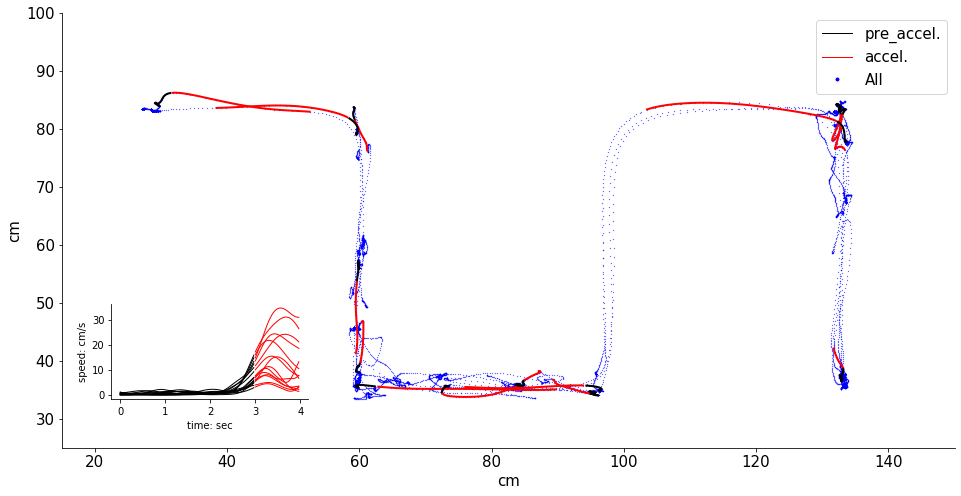

In [7]:
# rats = ''

from mpl_toolkits.axes_grid1.inset_locator import inset_axes

rats = '_pre'
print(rats)
erfdn = np.load('Rats/Rats_ephy'+rats+'.npy')[[1]];
erfdn = np.load('Rats/Screws_Rats/Rats/Rats_ephy'+rats+'.npy')[[1]]
n_r = len(erfdn)

fig = plt.figure(1, figsize=(1, 1))
fig.set_figheight(8); fig.set_figwidth(16)
gs  = GridSpec(2 , 4);

rr = 0

for rfdn in erfdn:
    
    epn       = np.load(rfdn+'tracking'+'/epn_ephy'+rats+'.npy')[[1]]

    print(rfdn[9:len(rfdn)-1], len(epn))
    n_k = len(epn)

    spd_f_ac = np.empty((0, T2+T_pre))
    n_acc_total = 0
    kk = 0
    lag_m       = np.load(rfdn+'tracking/lag_m.npy')
    idx_acc_f_T = np.load(rfdn+'tracking/idx_acc_f_T.npy')
    for k in epn:
        ax_idx = gs[0:2,0:4]; ax = fig.add_subplot(ax_idx);
#         ax_idx = gs[0,  2]; ax2 = fig.add_subplot(ax_idx);
        ax2 = inset_axes(ax, width="55%", height="55%",
#                   bbox_to_anchor=(30, 30, 10, 10),
                    bbox_to_anchor=(.05, .1, .4, .4),
                   bbox_transform=ax.transAxes,
                            loc=3)
        
        fdn = rfdn + k + '/'
        pos_Y = np.load(fdn+'tracking/'+'pos_Y_f.npy')
        pos_X = np.load(fdn+'tracking/'+'pos_X_f.npy')
        spd_f = np.load(fdn+'tracking/'+'spd_kal_f.npy');N_win = 15
        spd_f = np.convolve(spd_f, np.ones((N_win,))/N_win, mode='same')

        ax.plot(pos_X, pos_Y, '.b', ms= 0.5)
        ax.set_xlim([15,150]);ax.set_ylim([25,100])
        ax.set_xlabel('cm', fontsize=15);
        ax.set_ylabel('cm', fontsize=15);
        ax.tick_params(labelsize = 15)
        ax.spines['right'].set_visible(False); 
        ax.spines['top'].set_visible(False)
#         ax.set_title(k, fontsize=12)
#         ts_f = np.load(fdn+'tracking/'+'ts_f.npy'); l_t = len(ts_f)
#         T_ts = len(ts_f[idx_clean])/fps/60

        idx_acc_f   = np.load(fdn+'tracking/idx_acc_f.npy');
        T_acc_f     = np.load(fdn+'tracking/T_acc_f.npy');
        idx_acc_f_k = np.load(fdn+'tracking/idx_acc_f_k.npy');
        n_acc = len(idx_acc_f)
        if n_acc>0:
            lag   = lag_m[idx_acc_f_k];
            idx_acc_f_T_k = idx_acc_f_T[idx_acc_f_k];
            lag       = lag[idx_acc_f_T_k]
            T_acc_f   = T_acc_f[idx_acc_f_T_k]
            idx_acc_f = idx_acc_f[idx_acc_f_T_k]
            n_acc = len(idx_acc_f)
            n_acc_total = n_acc_total+n_acc
            if n_acc>0:
                
                idx_acc_f = idx_acc_f+T_acc_f-lag
                
                for i in np.arange(len(idx_acc_f)):
                    t_ref = idx_acc_f[i]
                    idx_t_spec = np.arange(t_ref-T_pre,t_ref+T1).astype('int')
                    ax.plot(pos_X[idx_t_spec], pos_Y[idx_t_spec], 'k', lw=2)
                    ax2.plot(t[0:T_pre+T1], spd_f[idx_t_spec], 'k', lw=1)
                    
                    idx_t_spec = np.arange(t_ref+T1,t_ref+T2).astype('int')
                    ax.plot(pos_X[idx_t_spec], pos_Y[idx_t_spec], 'r', lw=2)
                    ax2.plot(t[T1:T2],      spd_f[idx_t_spec], 'r', lw=1)
                ax2.set_xlabel('time: sec');ax2.set_ylabel('speed: cm/s')
                ax2.spines['right'].set_visible(False); ax2.spines['top'].set_visible(False)
    


                
                
#                 idx_t_spec = np.arange(t_ref-T_pre,t_ref+T1).astype('int')
                
#                 axins2.plot(t[0:T_pre+T1], spd_f[idx_t_spec], '.k', ms= 1)
                
#                 idx_t_spec = np.arange(t_ref+T1,t_ref+T2).astype('int')
                
#                 axins2.plot(t[T1:T2], spd_f[idx_t_spec], 'r')
                
                
#                 pos_X_m = pos_X[idx_t_spec].mean()
#                 pos_Y_m = pos_Y[idx_t_spec].mean()
#                 ax.arrow(pos_X_m-1, pos_Y_m-1, -20, -20, head_width=0.05, head_length=0.1, fc='k', ec='k')
#                 axins2.spines['right'].set_visible(False); axins2.spines['top'].set_visible(False)
        kk += 1
    print(n_acc_total)
    rr += 1
    

# ax_idx = gs[0,0]; ax = fig.add_subplot(ax_idx);
# ax.set_ylabel('freq, Hz \n Lesion side', fontsize = 15)
# ax_idx = gs[1,0]; ax = fig.add_subplot(ax_idx);
# ax.set_ylabel('freq, Hz \n Intact side', fontsize = 15)
# ax_idx = gs[2,0]; ax = fig.add_subplot(ax_idx);
# ax.set_ylabel('low band', fontsize = 15)
# ax_idx = gs[3,0]; ax = fig.add_subplot(ax_idx);
# ax.set_ylabel('high band', fontsize = 15)



preacc = Line2D([0], [0], color='k', ls = '-', lw=1,    label='pre_accel.')
acc    = Line2D([0], [0], color='r', ls = '-', lw=1,   label='accel.')
track  = Line2D([0], [0], color='w', marker='.', markerfacecolor='b', ms= 10 , label='All')
# intact = Patch(facecolor='red',label='intact')
# lesion = Patch(facecolor='blue',label='lesion')

ax.legend(handles=[preacc, acc, track], loc='upper right', fontsize = 15)
# ax_idx = gs[3,0]; ax = fig.add_subplot(ax_idx)
# ax.set_xlabel('t, Frames 30 fps, 5 seconds total');ax.set_ylabel('speed, cm/s');
# fig.suptitle('with 7 days of lesion, two sides have not big difference', fontsize=20)

plt.savefig('thesis/rice-thesis-latex_ziyingc/Figures/identifying_MI_exp.png')
plt.savefig('thesis/rice-thesis-latex_ziyingc/Figures/identifying_MI_exp.eps')
plt.savefig('thesis/rice-thesis-latex_ziyingc/Figures/identifying_MI_exp.pdf')

_post
Outlaw 1


Text(0.5,0,'red sections indicate removed artifact sections')

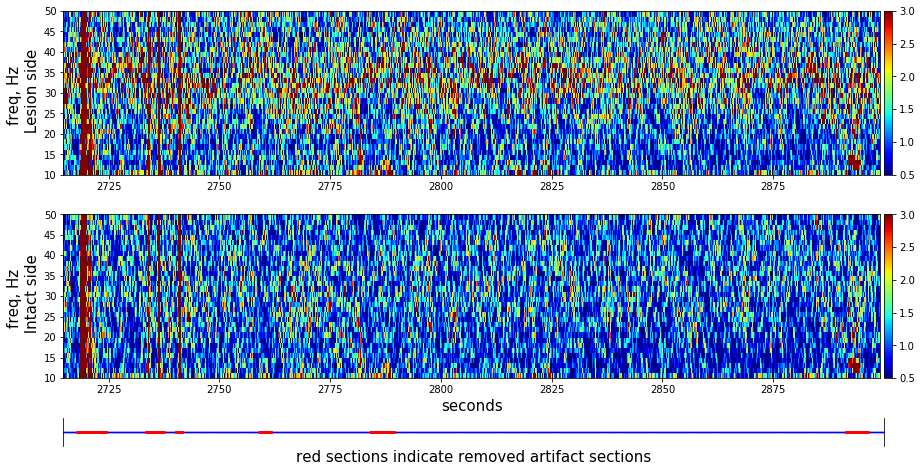

In [61]:
rats = '_post'
# rats = '_pre'
print(rats)
erfdn = np.load('Rats/Rats_ephy'+rats+'.npy')[[1]];
n_r = len(erfdn)

fig = plt.figure(1, figsize=(1, 1))
fig.set_figheight(8); fig.set_figwidth(15)
gs  = GridSpec(13 , 100);

rr = 0
n_acc_total_r = 0
for rfdn in erfdn:
    
    epn       = np.load(rfdn+'tracking'+'/epn_ephy'+rats+'.npy')[[21]]
    slope     = np.load(rfdn+'tracking'+'/slope_epn_ephy'+rats+'.npy')
    intercept = np.load(rfdn+'tracking'+'/intercept_epn_ephy'+rats+'.npy')

    subset = np.load(rfdn+'tracking'+'/subset_ephy_li.npy');
    print(rfdn[9:len(rfdn)-1], len(epn))
    n_k = len(epn)
    
    idx_k   = np.zeros((n_k,))>1
    
    Y_acc_l = np.zeros((l_fb, T2+T_pre));
    Y_acc_i = np.zeros((l_fb, T2+T_pre));
    y_acc_i_all = np.zeros((l_fb, ));
    
    Y_acc_l_m_bf_l = np.empty((0, T2+T_pre))
    Y_acc_l_m_bf_h = np.empty((0, T2+T_pre))
    Y_acc_i_m_bf_l = np.empty((0, T2+T_pre))
    Y_acc_i_m_bf_h = np.empty((0, T2+T_pre))
    spd_f_ac = np.empty((0, T2+T_pre))
    n_acc_total = 0
    kk = 0
    lag_m       = np.load(rfdn+'tracking/lag_m.npy')
    idx_acc_f_T = np.load(rfdn+'tracking/idx_acc_f_T.npy')
    for k in epn:
        fdn = rfdn + k + '/'
#         spd_f   = np.load(fdn+'tracking/'+'spd_f.npy');
        spd_f = np.load(fdn+'tracking/'+'spd_kal_f.npy');N_win = 10
        spd_f = np.convolve(spd_f, np.ones((N_win,))/N_win, mode='same')
        idx_clean_f   = np.load(fdn+'tracking/'+'idx_clean_f.npy');
        idx_clean_fft = np.load(fdn+'tracking/'+'idx_clean_fft.npy')
        idx_clean     = np.logical_and(idx_clean_f, idx_clean_fft)
        
        ts_f = np.load(fdn+'tracking/'+'ts_f.npy'); l_t = len(ts_f)
        T_ts = len(ts_f[idx_clean])/fps/60

        i_ref = 0;   i = subset[i_ref];    chn = str(i//10)+str(i%10)
        Y_f = np.load(fdn + mode+'_'+str(fs_out)+'/ch.'+chn+'.fps.npy')
        y_fit = 10**(x_fit*slope[i_ref,kk] + intercept[i_ref,kk]);  Y_f_fit_l = (Y_f/y_fit)[:,idx_band]
#         y_pre_acc = np.mean(Y_f_fit_l[idx_clean,:],axis=0)
#         Y_f_fit_l = Y_f_fit_l/y_pre_acc

        i_ref = 1;   i = subset[i_ref];    chn = str(i//10)+str(i%10)
        Y_f = np.load(fdn + mode+'_'+str(fs_out)+'/ch.'+chn+'.fps.npy')
        y_fit = 10**(x_fit*slope[i_ref,kk] + intercept[i_ref,kk]);  Y_f_fit_i = (Y_f/y_fit)[:,idx_band]
#         y_pre_acc = np.mean(Y_f_fit_i[idx_clean,:],axis=0)
#         Y_f_fit_i = Y_f_fit_i/y_pre_acc

        kk += 1

        ax_idx = gs[0:5,0:99]; ax = fig.add_subplot(ax_idx);
        im = ax.pcolormesh(ts_f, f_band, Y_f_fit_l.T, 
                                   vmin = 0.5,
                                   vmax = 3.0,
                           cmap=cm.jet);
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="1%", pad=0.05)
        fig.colorbar(im, cax=cax);

    

        ax_idx = gs[6:11,0:99]; ax = fig.add_subplot(ax_idx);
        im = ax.pcolormesh(ts_f, f_band, Y_f_fit_i.T, 
                                   vmin = 0.5,
                                   vmax = 3.0,
                           cmap=cm.jet);

        
        divider = make_axes_locatable(ax)
        cax = divider.append_axes("right", size="1%", pad=0.05)
        fig.colorbar(im, cax=cax);
    rr += 1
    

ax_idx = gs[0:5,0:99]; ax = fig.add_subplot(ax_idx);
ax.set_ylabel('freq, Hz \n Lesion side', fontsize = 15)
ax_idx = gs[6:11,0:99]; ax = fig.add_subplot(ax_idx);
ax.set_ylabel('freq, Hz \n Intact side', fontsize = 15)
ax.set_xlabel('seconds',  fontsize = 15)

ax_idx = gs[12,0:98]; ax = fig.add_subplot(ax_idx);
mk = np.ones((l_t,))
idx_clean_not = np.logical_not(idx_clean)
ax.plot(ts_f[idx_clean],    mk[idx_clean],'b.', ms =0.5)
ax.plot(ts_f[idx_clean_not],mk[idx_clean_not],'r.', ms = 3)

# ax.spines['right'].set_visible(False);
ax.spines['top'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.set_yticks([]);
ax.set_xticks([]);
ax.set_xlim([ts_f[0],ts_f[-1]])
ax.set_xlabel('red sections indicate removed artifact sections',  fontsize = 15)



